In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import sklearn
from scipy.sparse import load_npz
import pickle
import tqdm


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load data

In [ ]:
data_folder_path = "/content/drive/MyDrive/COMP30027/Assignment/data/ver1"
train_filename = 'recipe_train.csv'
test_filename = 'recipe_test.csv'

train_path = os.path.join(data_folder_path, train_filename)
test_path = os.path.join(data_folder_path, test_filename)

train_df = 	pd.read_csv(train_path, index_col = False, delimiter = ',', header=None)
train_df.rename(columns=train_df.iloc[0], inplace = True)
train_df.drop([0], inplace = True)
pd.set_option('display.max_colwidth', None)
train_df.head()

,name,n_steps,n_ingredients,steps,ingredients,duration_label
1,wi gal s chicken rice stove top dish made healthier,6,12,"['in saucepan , melt margarine and combine with olive oil', 'add celery & onion and saute until tender', 'add garlic for the last minute', 'add carrots , broth , rice and pepper and bring to a boil', 'reduce heat , cover , and simmer for 35 minutes , or until rice is tender', 'stir in chicken and parsley , cover , and simmer for 5 minutes longer or until heated through']","['margarine', 'olive oil', 'celery', 'onion', 'garlic clove', 'carrots', 'low sodium chicken broth', 'brown rice', 'pepper', 'salt substitute', 'boneless skinless chicken breasts', 'fresh parsley']",2.0
2,irish pin oats,9,5,"['melt 1 tbs butter in a small saucepan over med high heat', 'when the butter stops foaming , add the oats and stir well for 1 minute', 'reduce heat to low , and let the oats cook for 1 more minute', 'add the water , stir and place the lid on tightly', 'allow to simmer for 20 minutes , or until the majority of the water is absorbed', 'add the half and half and turn off the heat', 'replace the lid and allow to sit for 5 minutes', 'add the remaining 2 tbs butter and salt to taste', 'brown sugar and cinnamon may be added if you prefer sweet oats']","['butter', 'pinhead oats', 'water', 'half-and-half', 'salt']",2.0
3,cheesy beef n biscuit casserole,15,10,"['brown ground beef , onion and green pepper', 'drain', 'stir tomato sauce , chili powder and garlic salt', 'simmer while preparing dough', 'separate biscuit dough into 10 biscuits', 'pull each apart into 2 layers', 'press 10 biscuit layers over bottom of ungreased 9 inch baking pan', 'combine 1 / 2 cup cheese , sour cream and egg', 'mix well', 'remove meat mixture from heat', 'stir in sour cream mixture', 'spoon over biscuits', 'arrange remaining biscuit layers on top', 'sprinkle with remaining cheese', 'bake at 375 degrees for 30 to 35 minutes or until biscuits are a deep golden brown']","['ground beef', 'onion', 'green pepper', 'tomato sauce', 'chili powder', 'garlic salt', 'refrigerated biscuits', 'cheddar cheese', 'sour cream', 'egg']",2.0
4,lemonade chicken oamc,10,8,"['brown chicken in oil', 'combine all ingredients except cornstarch and bring to a boil', 'reduce heat', 'cover and simmer about 40 minutes until tender', 'combine cornstarch with 1 / 2 cup cold water and mix until blended', 'stir mixture into chicken mixture until thick and bubbly', 'allow to cool if you want to freeze it', 'if frozen , may need a little extra water when reheating', 'serve over rice or noodles', 'great with frozen green beans mixed in !']","['boneless skinless chicken', 'frozen lemonade', 'oil', 'catsup', 'vinegar', 'water', 'brown sugar', 'cornstarch']",2.0
5,graham and peanut butter bon bons,6,5,"['set almond bark aside', 'mix remaining ingredients together in a bowl', 'refrigerate for 1 hour', 'melt almond bark', 'form crumb mixture into balls and dip in melted almond bark , place on waxed paper', 'allow the almond bark to cool and set up']","['graham cracker crumbs', 'crunchy peanut butter', 'powdered sugar', 'crisp rice cereal', 'almond bark']",2.0


In [ ]:
doc2vec100_path = "/content/drive/MyDrive/COMP30027/Assignment/data/ver1/recipe_text_features_doc2vec400"

train_ingre_doc2vec100_filename = "train_ingr_doc2vec400.pkl"
train_ingre_doc2vec100_path = os.path.join(doc2vec100_path, train_ingre_doc2vec100_filename)
train_ingre_doc2vec100 = pd.read_pickle(train_ingre_doc2vec100_path)
print(f"Shape of doc2vec100 train ingre {train_ingre_doc2vec100.shape}")

train_steps_doc2vec100_filename = "train_step_doc2vec400.pkl"
train_steps_doc2vec100_path = os.path.join(doc2vec100_path, train_steps_doc2vec100_filename)
train_steps_doc2vec100 = pd.read_pickle(train_steps_doc2vec100_path)
print(f"Shape of doc2vec100 train steps {train_steps_doc2vec100.shape}")

train_name_doc2vec100_filename = "train_name_doc2vec400.pkl"
train_name_doc2vec100_path = os.path.join(doc2vec100_path, train_name_doc2vec100_filename)
train_name_doc2vec100 = pd.read_pickle(train_name_doc2vec100_path)
print(f"Shape of doc2vec100 train name {train_name_doc2vec100.shape}")

Shape of doc2vec100 train ingre (40000, 400)
Shape of doc2vec100 train steps (40000, 400)
Shape of doc2vec100 train name (40000, 400)


# Perfomance of ddiferent doc2vec


##Doc2Vec50

In [ ]:
doc2vec50_path = "/content/drive/MyDrive/COMP30027/Assignment/data/ver1/recipe_text_features_doc2vec50"

# import train data for doc2vec50
train_ingre_doc2vec50_filename = "train_ingr_doc2vec50.csv"
train_ingre_doc2vec50_path = os.path.join(doc2vec50_path, train_ingre_doc2vec50_filename)
train_ingre_doc2vec50 = pd.read_csv(train_ingre_doc2vec50_path, index_col = False, delimiter = ',', header=None)
print(f"Shape of doc2vec50 train ingre {train_ingre_doc2vec50.shape}")

train_steps_doc2vec50_filename = "train_steps_doc2vec50.csv"
train_steps_doc2vec50_path = os.path.join(doc2vec50_path, train_steps_doc2vec50_filename)
train_steps_doc2vec50 = pd.read_csv(train_steps_doc2vec50_path, index_col = False, delimiter = ',', header=None)
print(f"Shape of doc2vec50 train steps {train_steps_doc2vec50.shape}")

train_name_doc2vec50_filename = "train_name_doc2vec50.csv"
train_name_doc2vec50_path = os.path.join(doc2vec50_path, train_name_doc2vec50_filename)
train_name_doc2vec50 = pd.read_csv(train_name_doc2vec50_path, index_col = False, delimiter = ',', header=None)
print(f"Shape of doc2vec50 train name {train_name_doc2vec50.shape}")

Shape of doc2vec50 train ingre (40000, 50)
Shape of doc2vec50 train steps (40000, 50)
Shape of doc2vec50 train name (40000, 50)


In [ ]:
out = pd.concat([train_ingre_doc2vec50, train_name_doc2vec50, train_steps_doc2vec50], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(random_state=42,  max_iter = 10000, class_weight="balanced")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels= model.classes_))

              precision    recall  f1-score   support

         1.0       0.67      0.63      0.65      3524
         2.0       0.72      0.57      0.64      4070
         3.0       0.20      0.71      0.32       406

    accuracy                           0.61      8000
   macro avg       0.53      0.64      0.53      8000
weighted avg       0.67      0.61      0.63      8000



## Doc2vec100

In [ ]:
doc2vec100_path = "/content/drive/MyDrive/COMP30027/Assignment/data/ver1/recipe_text_features_doc2vec100"

train_ingre_doc2vec100_filename = "train_ingr_doc2vec100.csv"
train_ingre_doc2vec100_path = os.path.join(doc2vec100_path, train_ingre_doc2vec100_filename)
train_ingre_doc2vec100 = pd.read_csv(train_ingre_doc2vec100_path, index_col = False, delimiter = ',', header=None)
print(f"Shape of doc2vec100 train ingre {train_ingre_doc2vec100.shape}")

train_steps_doc2vec100_filename = "train_steps_doc2vec100.csv"
train_steps_doc2vec100_path = os.path.join(doc2vec100_path, train_steps_doc2vec100_filename)
train_steps_doc2vec100 = pd.read_csv(train_steps_doc2vec100_path, index_col = False, delimiter = ',', header=None)
print(f"Shape of doc2vec100 train steps {train_steps_doc2vec100.shape}")

train_name_doc2vec100_filename = "train_name_doc2vec100.csv"
train_name_doc2vec100_path = os.path.join(doc2vec100_path, train_name_doc2vec100_filename)
train_name_doc2vec100 = pd.read_csv(train_name_doc2vec100_path, index_col = False, delimiter = ',', header=None)
print(f"Shape of doc2vec100 train name {train_name_doc2vec100.shape}")

Shape of doc2vec100 train ingre (40000, 100)
Shape of doc2vec100 train steps (40000, 100)
Shape of doc2vec100 train name (40000, 100)


In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(random_state=42,  max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels= model.classes_))

              precision    recall  f1-score   support

         1.0       0.67      0.66      0.66      3524
         2.0       0.68      0.72      0.70      4070
         3.0       0.51      0.21      0.30       406

    accuracy                           0.67      8000
   macro avg       0.62      0.53      0.56      8000
weighted avg       0.67      0.67      0.67      8000



## Doc2vec200

In [ ]:
doc2vec100_path = "/content/drive/MyDrive/COMP30027/Assignment/data/ver1/recipe_text_features_doc2vec200"

train_ingre_doc2vec100_filename = "train_ingr_doc2vec200.pkl"
train_ingre_doc2vec100_path = os.path.join(doc2vec100_path, train_ingre_doc2vec100_filename)
train_ingre_doc2vec100 = pd.read_pickle(train_ingre_doc2vec100_path)
print(f"Shape of doc2vec100 train ingre {train_ingre_doc2vec100.shape}")

train_steps_doc2vec100_filename = "train_step_doc2vec200.pkl"
train_steps_doc2vec100_path = os.path.join(doc2vec100_path, train_steps_doc2vec100_filename)
train_steps_doc2vec100 = pd.read_pickle(train_steps_doc2vec100_path)
print(f"Shape of doc2vec100 train steps {train_steps_doc2vec100.shape}")

train_name_doc2vec100_filename = "train_name_doc2vec200.pkl"
train_name_doc2vec100_path = os.path.join(doc2vec100_path, train_name_doc2vec100_filename)
train_name_doc2vec100 = pd.read_pickle(train_name_doc2vec100_path)
print(f"Shape of doc2vec100 train name {train_name_doc2vec100.shape}")

Shape of doc2vec100 train ingre (40000, 200)
Shape of doc2vec100 train steps (40000, 200)
Shape of doc2vec100 train name (40000, 200)


In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42,  max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels= model.classes_))

              precision    recall  f1-score   support

         1.0       0.70      0.71      0.71      3524
         2.0       0.73      0.75      0.74      4070
         3.0       0.66      0.41      0.51       406

    accuracy                           0.71      8000
   macro avg       0.70      0.62      0.65      8000
weighted avg       0.71      0.71      0.71      8000



## Doc2vec300

In [ ]:
doc2vec100_path = "/content/drive/MyDrive/COMP30027/Assignment/data/ver1/recipe_text_features_doc2vec300"

train_ingre_doc2vec100_filename = "train_ingr_doc2vec200.pkl"
train_ingre_doc2vec100_path = os.path.join(doc2vec100_path, train_ingre_doc2vec100_filename)
train_ingre_doc2vec100 = pd.read_pickle(train_ingre_doc2vec100_path)
print(f"Shape of doc2vec100 train ingre {train_ingre_doc2vec100.shape}")

train_steps_doc2vec100_filename = "train_step_doc2vec200.pkl"
train_steps_doc2vec100_path = os.path.join(doc2vec100_path, train_steps_doc2vec100_filename)
train_steps_doc2vec100 = pd.read_pickle(train_steps_doc2vec100_path)
print(f"Shape of doc2vec100 train steps {train_steps_doc2vec100.shape}")

train_name_doc2vec100_filename = "train_name_doc2vec200.pkl"
train_name_doc2vec100_path = os.path.join(doc2vec100_path, train_name_doc2vec100_filename)
train_name_doc2vec100 = pd.read_pickle(train_name_doc2vec100_path)
print(f"Shape of doc2vec100 train name {train_name_doc2vec100.shape}")

Shape of doc2vec100 train ingre (40000, 300)
Shape of doc2vec100 train steps (40000, 300)
Shape of doc2vec100 train name (40000, 300)


In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=32)
model = LogisticRegression(random_state=42,  max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels= model.classes_))

              precision    recall  f1-score   support

         1.0       0.70      0.70      0.70      3580
         2.0       0.72      0.74      0.73      3995
         3.0       0.66      0.41      0.51       425

    accuracy                           0.71      8000
   macro avg       0.69      0.62      0.65      8000
weighted avg       0.71      0.71      0.71      8000



## doc2vec400

In [ ]:
doc2vec100_path = "/content/drive/MyDrive/COMP30027/Assignment/data/ver1/recipe_text_features_doc2vec400"

train_ingre_doc2vec100_filename = "train_ingr_doc2vec200.pkl"
train_ingre_doc2vec100_path = os.path.join(doc2vec100_path, train_ingre_doc2vec100_filename)
train_ingre_doc2vec100 = pd.read_pickle(train_ingre_doc2vec100_path)
print(f"Shape of doc2vec100 train ingre {train_ingre_doc2vec100.shape}")

train_steps_doc2vec100_filename = "train_step_doc2vec200.pkl"
train_steps_doc2vec100_path = os.path.join(doc2vec100_path, train_steps_doc2vec100_filename)
train_steps_doc2vec100 = pd.read_pickle(train_steps_doc2vec100_path)
print(f"Shape of doc2vec100 train steps {train_steps_doc2vec100.shape}")

train_name_doc2vec100_filename = "train_name_doc2vec200.pkl"
train_name_doc2vec100_path = os.path.join(doc2vec100_path, train_name_doc2vec100_filename)
train_name_doc2vec100 = pd.read_pickle(train_name_doc2vec100_path)
print(f"Shape of doc2vec100 train name {train_name_doc2vec100.shape}")

Shape of doc2vec100 train ingre (40000, 400)
Shape of doc2vec100 train steps (40000, 400)
Shape of doc2vec100 train name (40000, 400)


In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=32)
model = LogisticRegression(random_state=42,  max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels= model.classes_))

              precision    recall  f1-score   support

         1.0       0.70      0.71      0.71      3580
         2.0       0.72      0.74      0.73      3995
         3.0       0.67      0.45      0.54       425

    accuracy                           0.71      8000
   macro avg       0.70      0.63      0.66      8000
weighted avg       0.71      0.71      0.71      8000



# PCA with doc2vec

In [ ]:
for num_feature in tqdm(range(50,400, 50)):
    print(f"Number of features: {num_feature}")

    # dimension reduction to desired number of features before splitting into train and validate
    pca = PCA(n_components=num_feature)
    pca.fit(np.transpose(train_name_doc2vec100))
    train_name_doc2vec200 = pd.DataFrame(np.transpose(pca.components_))

    pca = PCA(n_components=num_feature)
    pca.fit(np.transpose(train_steps_doc2vec100))
    train_steps_doc2vec200 = pd.DataFrame( np.transpose( pca.components_))

    pca = PCA(n_components=num_feature)
    pca.fit(np.transpose(train_ingre_doc2vec100))
    train_ingre_doc2vec200 = pd.DataFrame( np.transpose( pca.components_))

    # train model on concaternated features
    out = pd.concat([train_ingre_doc2vec200, train_name_doc2vec200, train_steps_doc2vec200], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=42)
    model1 = LinearSVC(max_iter = 100000)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    print(classification_report(y_test, y_pred))

  0%|          | 0/7 [00:00<?, ?it/s]

Number of features: 50


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 14%|█▍        | 1/7 [00:10<01:04, 10.69s/it]

              precision    recall  f1-score   support

         1.0       0.66      0.65      0.65      3524
         2.0       0.67      0.74      0.70      4070
         3.0       0.00      0.00      0.00       406

    accuracy                           0.66      8000
   macro avg       0.44      0.46      0.45      8000
weighted avg       0.63      0.66      0.65      8000

Number of features: 100


 29%|██▊       | 2/7 [00:28<01:03, 12.74s/it]

              precision    recall  f1-score   support

         1.0       0.68      0.67      0.67      3524
         2.0       0.68      0.76      0.72      4070
         3.0       0.67      0.00      0.01       406

    accuracy                           0.68      8000
   macro avg       0.68      0.48      0.47      8000
weighted avg       0.68      0.68      0.66      8000

Number of features: 150


 43%|████▎     | 3/7 [00:50<01:02, 15.56s/it]

              precision    recall  f1-score   support

         1.0       0.68      0.68      0.68      3524
         2.0       0.69      0.76      0.72      4070
         3.0       0.92      0.03      0.06       406

    accuracy                           0.69      8000
   macro avg       0.77      0.49      0.49      8000
weighted avg       0.70      0.69      0.67      8000

Number of features: 200


 57%|█████▋    | 4/7 [01:16<00:56, 18.87s/it]

              precision    recall  f1-score   support

         1.0       0.69      0.69      0.69      3524
         2.0       0.70      0.77      0.73      4070
         3.0       0.97      0.07      0.13       406

    accuracy                           0.70      8000
   macro avg       0.79      0.51      0.52      8000
weighted avg       0.71      0.70      0.68      8000

Number of features: 250


 71%|███████▏  | 5/7 [01:47<00:44, 22.37s/it]

              precision    recall  f1-score   support

         1.0       0.69      0.70      0.70      3524
         2.0       0.71      0.77      0.74      4070
         3.0       0.91      0.13      0.22       406

    accuracy                           0.70      8000
   macro avg       0.77      0.53      0.55      8000
weighted avg       0.71      0.70      0.69      8000

Number of features: 300


 86%|████████▌ | 6/7 [02:26<00:27, 27.22s/it]

              precision    recall  f1-score   support

         1.0       0.70      0.70      0.70      3524
         2.0       0.72      0.77      0.74      4070
         3.0       0.89      0.17      0.28       406

    accuracy                           0.71      8000
   macro avg       0.77      0.55      0.57      8000
weighted avg       0.72      0.71      0.70      8000

Number of features: 350


100%|██████████| 7/7 [03:01<00:00, 25.93s/it]

              precision    recall  f1-score   support

         1.0       0.70      0.70      0.70      3524
         2.0       0.72      0.77      0.74      4070
         3.0       0.91      0.18      0.30       406

    accuracy                           0.71      8000
   macro avg       0.78      0.55      0.58      8000
weighted avg       0.72      0.71      0.70      8000



In [ ]:
for num_feature in tqdm(range(50,400, 50)):
    print(f"Number of features: {num_feature}")

    # dimension reduction to desired number of features before splitting into train and validate
    pca = PCA(n_components=num_feature)
    pca.fit(np.transpose(train_name_doc2vec100))
    train_name_doc2vec200 = pd.DataFrame(np.transpose(pca.components_))

    pca = PCA(n_components=num_feature)
    pca.fit(np.transpose(train_steps_doc2vec100))
    train_steps_doc2vec200 = pd.DataFrame( np.transpose( pca.components_))

    pca = PCA(n_components=num_feature)
    pca.fit(np.transpose(train_ingre_doc2vec100))
    train_ingre_doc2vec200 = pd.DataFrame( np.transpose( pca.components_))

    # train model on concaternated features
    out = pd.concat([train_ingre_doc2vec200, train_name_doc2vec200, train_steps_doc2vec200], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=42)
    model1 = LinearSVC(max_iter = 100000)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    print(classification_report(y_test, y_pred))

  0%|          | 0/7 [00:00<?, ?it/s]

Number of features: 50


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 14%|█▍        | 1/7 [00:10<01:04, 10.69s/it]

              precision    recall  f1-score   support

         1.0       0.66      0.65      0.65      3524
         2.0       0.67      0.74      0.70      4070
         3.0       0.00      0.00      0.00       406

    accuracy                           0.66      8000
   macro avg       0.44      0.46      0.45      8000
weighted avg       0.63      0.66      0.65      8000

Number of features: 100


 29%|██▊       | 2/7 [00:28<01:03, 12.74s/it]

              precision    recall  f1-score   support

         1.0       0.68      0.67      0.67      3524
         2.0       0.68      0.76      0.72      4070
         3.0       0.67      0.00      0.01       406

    accuracy                           0.68      8000
   macro avg       0.68      0.48      0.47      8000
weighted avg       0.68      0.68      0.66      8000

Number of features: 150


 43%|████▎     | 3/7 [00:50<01:02, 15.56s/it]

              precision    recall  f1-score   support

         1.0       0.68      0.68      0.68      3524
         2.0       0.69      0.76      0.72      4070
         3.0       0.92      0.03      0.06       406

    accuracy                           0.69      8000
   macro avg       0.77      0.49      0.49      8000
weighted avg       0.70      0.69      0.67      8000

Number of features: 200


 57%|█████▋    | 4/7 [01:16<00:56, 18.87s/it]

              precision    recall  f1-score   support

         1.0       0.69      0.69      0.69      3524
         2.0       0.70      0.77      0.73      4070
         3.0       0.97      0.07      0.13       406

    accuracy                           0.70      8000
   macro avg       0.79      0.51      0.52      8000
weighted avg       0.71      0.70      0.68      8000

Number of features: 250


 71%|███████▏  | 5/7 [01:47<00:44, 22.37s/it]

              precision    recall  f1-score   support

         1.0       0.69      0.70      0.70      3524
         2.0       0.71      0.77      0.74      4070
         3.0       0.91      0.13      0.22       406

    accuracy                           0.70      8000
   macro avg       0.77      0.53      0.55      8000
weighted avg       0.71      0.70      0.69      8000

Number of features: 300


 86%|████████▌ | 6/7 [02:26<00:27, 27.22s/it]

              precision    recall  f1-score   support

         1.0       0.70      0.70      0.70      3524
         2.0       0.72      0.77      0.74      4070
         3.0       0.89      0.17      0.28       406

    accuracy                           0.71      8000
   macro avg       0.77      0.55      0.57      8000
weighted avg       0.72      0.71      0.70      8000

Number of features: 350


100%|██████████| 7/7 [03:01<00:00, 25.93s/it]

              precision    recall  f1-score   support

         1.0       0.70      0.70      0.70      3524
         2.0       0.72      0.77      0.74      4070
         3.0       0.91      0.18      0.30       406

    accuracy                           0.71      8000
   macro avg       0.78      0.55      0.58      8000
weighted avg       0.72      0.71      0.70      8000



# Model

## Xgboost

In [ ]:
data = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
y = pd.DataFrame(train_df["duration_label"])

In [ ]:
concat_feature_word2vec100 = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train100, X_test100, y_train100, y_test100 = train_test_split(concat_feature_word2vec100,  train_df["duration_label"], test_size=0.2, random_state=42)
X_train100.columns = range(0,1200)
X_test100.columns = range(0,1200)

In [ ]:
model = XGBClassifier(max_depth=10, n_estimators=100 )
model.fit(X_train100, y_train100)
y_pred100 = model.predict(X_test100)
print(classification_report(y_test100, y_pred100, target_names=model.classes_))

              precision    recall  f1-score   support

         1.0       0.73      0.64      0.68      3524
         2.0       0.68      0.82      0.75      4070
         3.0       0.94      0.04      0.08       406

    accuracy                           0.70      8000
   macro avg       0.79      0.50      0.50      8000
weighted avg       0.72      0.70      0.68      8000



## SVM

In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=42)
model1 = LinearSVC(max_iter = 100000)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_testra
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.70      0.72      0.71      3524
         2.0       0.73      0.75      0.74      4070
         3.0       0.76      0.32      0.45       406

    accuracy                           0.72      8000
   macro avg       0.73      0.60      0.63      8000
weighted avg       0.72      0.72      0.71      8000



## RF

In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators = 1000,max_depth = 10, random_state = 42, n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=rf.classes_))

              precision    recall  f1-score   support

         1.0       0.74      0.52      0.61      3524
         2.0       0.64      0.87      0.74      4070
         3.0       0.00      0.00      0.00       406

    accuracy                           0.67      8000
   macro avg       0.46      0.46      0.45      8000
weighted avg       0.65      0.67      0.64      8000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.2, random_state=42)
rf = BalancedRandomForestClassifier(n_estimators = 1000,max_depth = 100, random_state = 42, n_jobs = -1, bootstrap = False)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=rf.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

              precision    recall  f1-score   support

         1.0       0.73      0.59      0.65      3524
         2.0       0.70      0.70      0.70      4070
         3.0       0.26      0.73      0.39       406

    accuracy                           0.65      8000
   macro avg       0.56      0.67      0.58      8000
weighted avg       0.69      0.65      0.66      8000



## DT




Reference: https://medium.com/@mohtedibfindepth-parameter-tuning-for-decision-tree-6753118a03c3

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

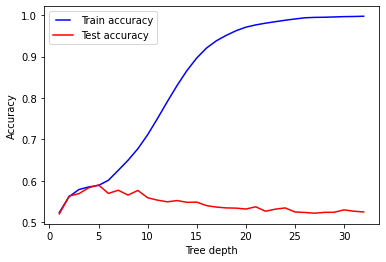

In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.1, random_state=42)
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in tqdm(max_depths):
   dt = DecisionTreeClassifier(max_depth=max_depth, random_state=  42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   accuracy = accuracy_score(y_train, train_pred)
   train_results.append(accuracy)

   y_pred = dt.predict(X_test)
   accuracy = accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

line1, = plt.plot(max_depths, train_results, color= "b", label= "Train accuracy")
line2, = plt.plot(max_depths, test_results, color = "r", label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("Tree depth")
plt.show()


100%|██████████| 9/9 [02:40<00:00, 17.78s/it]


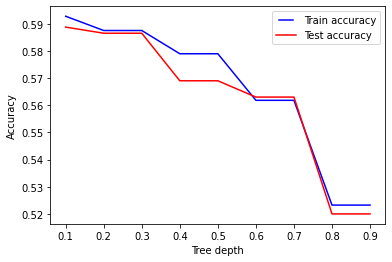

In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.1, random_state=42)
min_samples_splits = np.arange(0.1,1.0,0.1)
train_results = []
test_results = []
for min_samples_split in tqdm(min_samples_splits):
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=  42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   accuracy = accuracy_score(y_train, train_pred)
   train_results.append(accuracy)

   y_pred = dt.predict(X_test)
   accuracy = accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

line1, = plt.plot(min_samples_splits, train_results, color= "b", label= "Train accuracy")
line2, = plt.plot(min_samples_splits, test_results, color = "r", label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("min_samples_splits")
plt.show()



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:20<01:21, 20.37s/it]

 40%|████      | 2/5 [00:34<00:55, 18.46s/it]

 60%|██████    | 3/5 [00:44<00:32, 16.08s/it]

 80%|████████  | 4/5 [00:51<00:13, 13.13s/it]

100%|██████████| 5/5 [00:57<00:00, 11.43s/it]


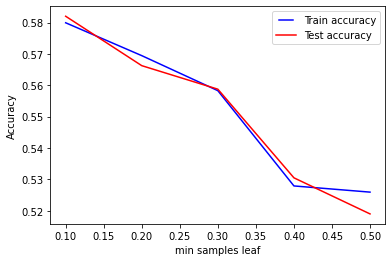

In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.1, random_state=42)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf  in tqdm(min_samples_leafs):
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=  42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   accuracy = accuracy_score(y_train, train_pred)
   train_results.append(accuracy)

   y_pred = dt.predict(X_test)
   accuracy = accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

line1, = plt.plot(min_samples_leafs, train_results, color= "b", label= "Train accuracy")
line2, = plt.plot(min_samples_leafs, test_results, color = "r", label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("min samples leaf")
plt.show()



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:10<00:43, 10.98s/it]

 40%|████      | 2/5 [00:33<00:42, 14.30s/it]

 60%|██████    | 3/5 [01:06<00:40, 20.03s/it]

 80%|████████  | 4/5 [01:51<00:27, 27.58s/it]

100%|██████████| 5/5 [02:47<00:00, 33.58s/it]


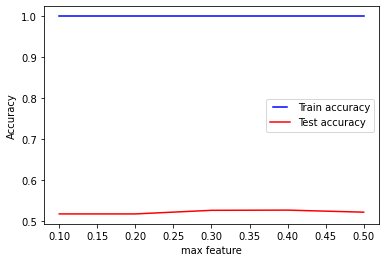

In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.1, random_state=42)
max_features  = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for max_feature  in tqdm(max_features ):
   dt = DecisionTreeClassifier(max_features =max_feature, random_state=  42)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   accuracy = accuracy_score(y_train, train_pred)
   train_results.append(accuracy)

   y_pred = dt.predict(X_test)
   accuracy = accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

line1, = plt.plot(max_features, train_results, color= "b", label= "Train accuracy")
line2, = plt.plot(max_features, test_results, color = "r", label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("max feature")
plt.show()

In [ ]:
model = DecisionTreeClassifier()
max_depth = np.linspace(1, 10, 10, endpoint=True)
min_samples_split = np.arange(0.1,0.4,0.1)
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features  = np.linspace(0.1, 0.5, 5, endpoint=True)
# define grid search
grid = dict(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='f1_micro',error_score=0)
grid_result = grid_search.fit(data,  train_df["duration_label"])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.577500 using {'max_depth': 4.0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.522575 (0.005255) with: {'max_depth': 1.0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.522575 (0.005255) with: {'max_depth': 1.0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2}
0.522575 (0.005255) with: {'max_depth': 1.0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004}
0.522575 (0.005255) with: {'max_depth': 1.0, 'min_samples_leaf': 0.1, 'min_samples_split': 0.4}
0.522575 (0.005255) with: {'max_depth': 1.0, 'min_samples_leaf': 0.2, 'min_samples_split': 0.1}
0.522575 (0.005255) with: {'max_depth': 1.0, 'min_samples_leaf': 0.2, 'min_samples_split': 0.2}
0.522575 (0.005255) with: {'max_depth': 1.0, 'min_samples_leaf': 0.2, 'min_samples_split': 0.30000000000000004}
0.522575 (0.005255) with: {'max_depth': 1.0, 'min_samples_leaf': 0.2, 'min_samples_split': 0.4}
0.524575 (0.004271) with: {'max_depth': 1.0, 'min_samples_leaf': 0.30000000000000004, 'min_samples_split': 0.

In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.1, random_state=42)
dt = DecisionTreeClassifier(max_depth=5, random_state=  42, min_samples_split = 0.1, min_samples_leaf= 0.1,max_features = 0.4 )
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred, labels= dt.classes_))

              precision    recall  f1-score   support

         1.0       0.60      0.39      0.47      1763
         2.0       0.57      0.81      0.67      2038
         3.0       0.00      0.00      0.00       199

    accuracy                           0.58      4000
   macro avg       0.39      0.40      0.38      4000
weighted avg       0.56      0.58      0.55      4000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = dt.predict(X_train)
print(classification_report(y_train, y_pred, labels= dt.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.62      0.38      0.47     15942
         2.0       0.57      0.82      0.67     18208
         3.0       0.00      0.00      0.00      1850

    accuracy                           0.58     36000
   macro avg       0.39      0.40      0.38     36000
weighted avg       0.56      0.58      0.55     36000



## Logistic Regression

In [ ]:
out = pd.concat([train_ingre_doc2vec100, train_name_doc2vec100, train_steps_doc2vec100], axis=1)
X_train, X_test, y_train, y_test = train_test_split(out,  train_df["duration_label"], test_size=0.1, random_state=42)
model = LogisticRegression(random_state=42,  max_iter = 100000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels= model.classes_))

              precision    recall  f1-score   support

         1.0       0.71      0.74      0.73      1763
         2.0       0.75      0.75      0.75      2038
         3.0       0.62      0.44      0.51       199

    accuracy                           0.73      4000
   macro avg       0.69      0.64      0.66      4000
weighted avg       0.73      0.73      0.73      4000

